In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,NaN,35.0,NaN,NaN,0.627,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,NaN,40.0,35.0,NaN,NaN,2.288,NaN
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	38
float64		column 2	76
float64		column 3	95
float64		column 4	19
float64		column 5	133
float64		column 6	133
float64		column 7	19
float64		column 8	114


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,730.000000,692.000000,673.000000,749.000000,635.000000,635.000000,749.000000,654.000000
mean,3.791781,120.596821,69.334324,20.433912,77.716535,31.909134,0.468115,33.406728
std,3.346548,31.894737,18.988866,15.947691,109.960596,7.710297,0.325738,11.867170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.150000,0.241000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.000000,0.368000,29.000000
75%,6.000000,139.250000,80.000000,32.000000,123.500000,36.500000,0.619000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

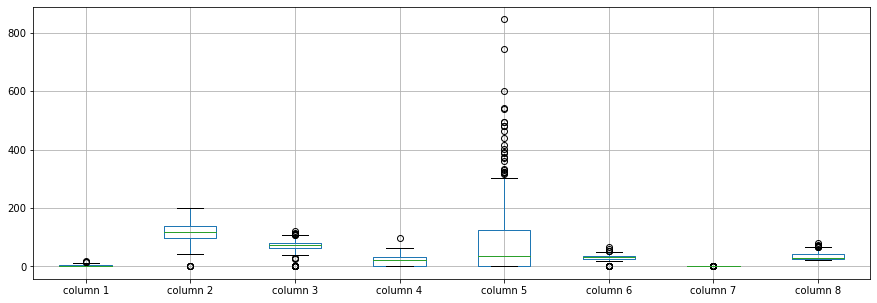

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1      3.791781
column 2    120.596821
column 3     69.334324
column 4     20.433912
column 5     77.716535
column 6     31.909134
column 7      0.468115
column 8     33.406728
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.139212,0.108844,-0.092050,-0.049022,0.063782,-0.020906,0.533203
column 2,0.139212,1.000000,0.119069,0.035708,0.276402,0.194146,0.121448,0.231039
column 3,0.108844,0.119069,1.000000,0.182928,0.053702,0.299238,0.018218,0.231246
column 4,-0.092050,0.035708,0.182928,1.000000,0.419348,0.377134,0.177337,-0.115026
column 5,-0.049022,0.276402,0.053702,0.419348,1.000000,0.149521,0.126280,-0.035690
column 6,0.063782,0.194146,0.299238,0.377134,0.149521,1.000000,0.092168,0.052447
column 7,-0.020906,0.121448,0.018218,0.177337,0.126280,0.092168,1.000000,0.012531
column 8,0.533203,0.231039,0.231246,-0.115026,-0.035690,0.052447,0.012531,1.000000


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [8,8+33,8+33+33,8+33+33+33,8+33+33+33+33,8+33+33+33+33+33,8+33+33+33+33,8+33+33+33,8+33+33,8+33,8], vae_layer = False, seed = 33)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 367.8165562947591
Epoch: 1 , loss: 368.10658899943036
Epoch: 2 , loss: 363.322553952535
Epoch: 3 , loss: 367.2221787770589
Epoch: 4 , loss: 364.3550001780192
Epoch: 5 , loss: 362.0646495819092
Epoch: 6 , loss: 338.6274979909261
Epoch: 7 , loss: 313.37901242574054
Epoch: 8 , loss: 302.30897013346356
Epoch: 9 , loss: 296.4489065806071
Epoch: 10 , loss: 289.13936201731366
Epoch: 11 , loss: 284.7013641993205
Epoch: 12 , loss: 281.3591998418172
Epoch: 13 , loss: 279.0342747370402
Epoch: 14 , loss: 266.9040298461914
Epoch: 15 , loss: 268.30334917704266
Epoch: 16 , loss: 269.48698139190674
Epoch: 17 , loss: 266.6613124211629
Epoch: 18 , loss: 264.93316713968915
Epoch: 19 , loss: 269.9770278930664
Epoch: 20 , loss: 263.18088308970135
Epoch: 21 , loss: 258.4351685841878
Epoch: 22 , loss: 266.0283610026042
Epoch: 23 , loss: 262.19207700093585
Epoch: 24 , loss: 251.66756216684976
Epoch: 25 , loss: 249.659925460815

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,-15.037716,0.0,47.821033,-6.145116,0.0,-21.020685
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,-101.071484,0.000000,0.0,-147.011972,-31.801803,0.0,-20.809328
...,...,...,...,...,...,...,...,...
763,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
764,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
765,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
766,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1955.7096103355716, 5776.576248839705)

In [18]:
NRMS=numerator/denominator
NRMS


0.33855860739800664

In [19]:
new_df.iloc[66,:]

column 1     0.000000
column 2    49.468845
column 3    88.000000
column 4    30.000000
column 5    28.692711
column 6    15.696607
column 7     0.855000
column 8    16.770666
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.000000,56.962284,35.0,47.821033,27.454884,0.627,28.979315
1,1.0,85.000000,66.000000,29.0,0.000000,26.600000,0.351,31.000000
2,8.0,183.000000,64.000000,0.0,0.000000,23.300000,0.672,32.000000
3,1.0,89.000000,66.000000,23.0,94.000000,28.100000,0.167,21.000000
4,0.0,35.928516,40.000000,35.0,20.988028,11.298197,2.288,12.190672
...,...,...,...,...,...,...,...,...
763,10.0,101.000000,76.000000,48.0,180.000000,32.900000,0.171,63.000000
764,2.0,122.000000,70.000000,27.0,0.000000,36.800000,0.340,27.000000
765,5.0,121.000000,72.000000,23.0,112.000000,26.200000,0.245,30.000000
766,1.0,126.000000,60.000000,0.0,0.000000,30.100000,0.349,47.000000


In [21]:
imputations[-1].to_excel("PID_AE_10.xlsx", index=False, header=False)